#  Curve fitting and the $\chi^2$ error surface
Material to accompany Hughes and Hase Section 6.5

## Introduction

## Imports and Function Definitions

In [1]:
import numpy as np
from scipy import optimize
from scipy import stats

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

#### Define lorentzian function

In [3]:
def s(x,a,b,c,d):
    return a/(1 + 4.*(x-b)**2/c**2) + d

def chi2(a,b,c,d):
    return np.sum((y - s(x, a,b,c,d))**2/u**2)

In [4]:
a = 6.
b = 45.
c = 1.
d = 1.8

In [6]:
x = np.linspace(40,50,41)
u = np.ones(len(x))*0.5
y = stats.norm.rvs(s(x,a,b,c,d),u)


In [7]:
y = np.array([2.3368343 , 1.34779084, 1.8359938 , 2.78223311, 2.6160017 ,
       1.75109169, 1.81029867, 1.91741858, 2.26092016, 1.35760885,
       2.38578689, 2.19548187, 2.62232795, 2.11509127, 2.80168284,
       3.11734207, 2.54432248, 3.70853398, 4.68017151, 6.52345283,
       8.05331083, 6.84402583, 4.4475071 , 4.40291663, 2.98949107,
       2.57962956, 1.56408314, 1.42208052, 1.73807925, 2.12689938,
       2.20403272, 2.07628801, 1.73888035, 2.12173406, 1.28526658,
       2.05163343, 2.2347432 , 2.39643299, 2.11739882, 0.84690595,
       1.84845063])

<IPython.core.display.Javascript object>


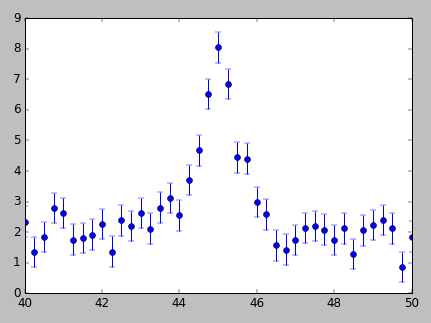

In [8]:
plt.figure()
plt.errorbar(x,y,u, fmt='o');

In [10]:
p0 = 6, 45, 0.5, 1.5

<IPython.core.display.Javascript object>


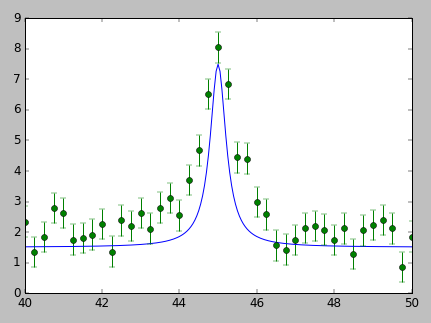

In [11]:
plt.figure()
xc = np.linspace(40,50,201)
yc = s(xc, *p0)
plt.plot(xc,yc)
plt.errorbar(x,y,u,fmt='o');

In [12]:
popt, pcov = optimize.curve_fit(s, x, y, p0, sigma = u, absolute_sigma=True)

In [13]:
popt, pcov

(array([ 6.20278476, 45.00932596,  0.9465391 ,  1.83102775]),
 array([[ 1.67664992e-01,  2.18492272e-05, -2.39910322e-02,
         -2.75953675e-03],
        [ 2.18492272e-05,  9.86066774e-04, -7.87327656e-06,
          3.73162384e-06],
        [-2.39910322e-02, -7.87327656e-06,  1.05663067e-02,
         -5.59235946e-03],
        [-2.75953675e-03,  3.73162384e-06, -5.59235946e-03,
          1.11681472e-02]]))

<IPython.core.display.Javascript object>


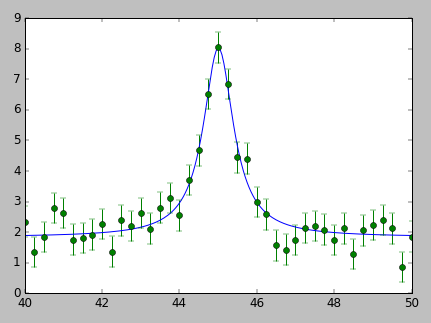

In [14]:
plt.figure()
xc = np.linspace(40,50,201)
yc = s(xc, *popt)
plt.plot(xc,yc)
plt.errorbar(x,y,u,fmt='o');

In [49]:
a, b, c, d = popt

<IPython.core.display.Javascript object>


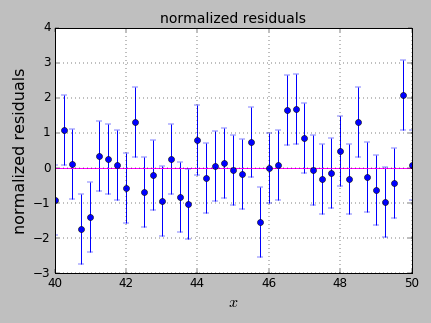

In [15]:
plt.figure()
plt.axhline(0,color='magenta')
plt.title('normalized residuals',fontsize=14)
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.errorbar(x,(s(x,*popt)-y)/u,1,fmt='o');

In [54]:
chi2(*popt)

30.69514526231158

## Check correlations in fit parameters

### Correlation of peak amplitude and position ($a$ and $b$)

<IPython.core.display.Javascript object>


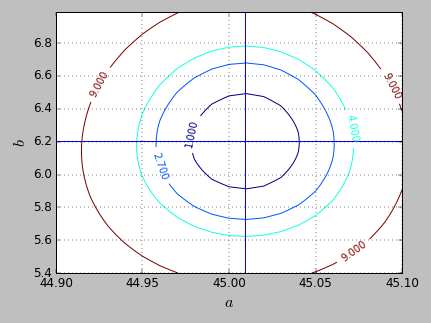

In [156]:
A = np.arange(5.4,7, 0.01)
B = np.arange(44.9,45.1,0.01)
C = np.arange(0.8,1.8,0.01)
D = np.arange(1.7,1.9,0.01)
Z = np.zeros((len(B),len(A)))

for i in range(len(A)):
    for j in range(len(B)):
        Z[j,i] = chi2(A[i],B[j],c,d) - chi2(*popt)

plt.figure()
A, B = np.meshgrid(A, B)
CS = plt.contour(B, A, Z, levels=[1,2.7,4,9])
plt.xlabel('$a$')
plt.ylabel('$b$')
plt.grid()
plt.axhline(a)
#plt.axhline(a+np.sqrt(pcov[0,0]))
plt.axvline(b)
plt.clabel(CS, inline=1, fontsize=10);

### Correlation in width and background ($c$ and $d$)

<IPython.core.display.Javascript object>


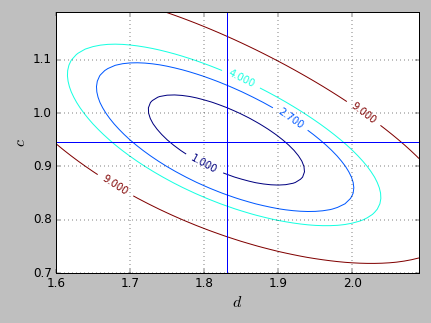

In [166]:
A = np.arange(5.4,7, 0.01)
B = np.arange(44.9,45.1,0.01)
C = np.arange(0.7,1.2,0.01)
D = np.arange(1.6,2.1,0.01)
Z = np.zeros((len(D),len(C)))

for i in range(len(C)):
    for j in range(len(D)):
        Z[j,i] = chi2(a,b,C[i],D[j]) - chi2(*popt)

plt.figure()
C, D = np.meshgrid(C,D)
CS = plt.contour(D, C, Z, levels=[1,2.7,4,9])
plt.xlabel('$d$')
plt.ylabel('$c$')
plt.grid()
plt.axhline(c)
#plt.axhline(a+np.sqrt(pcov[0,0]))
plt.axvline(d)
plt.clabel(CS, inline=1, fontsize=10);

In [161]:
a,b,c,d

(6.202784762966448, 45.009325961289726, 0.946539103718111, 1.831027750556071)

### Version details

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

In [23]:
%version_information numpy, scipy, numdifftools, matplotlib

Software versions
Python 3.6.6 32bit [GCC 7.2.0]
IPython 6.4.0
OS Linux 4.9.0 7 686 pae i686 with debian 9.11
numpy 1.14.3
scipy 1.1.0
numdifftools The 'numdifftools' distribution was not found and is required by the application
matplotlib 2.2.2
Sat Feb 15 09:59:08 2020 EST